In [1]:
import pandas as pd

In [2]:
df2= pd.read_csv("Ratings.csv")

In [3]:
df2

,Unnamed: 0,name,rating,review
0,0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,1,Jalsa,4.0,I was here for dinner with my family on a week...
2,2,Jalsa,2.0,Its a restaurant near to Banashankari BDA Me a...
3,3,Jalsa,4.0,We went here on a weekend and one of us had th...
4,4,Jalsa,5.0,The best thing about the place is its ambiance...
...,...,...,...,...
1319963,1319963,Chime - Sheraton Grand Bengaluru Whitefield Ho...,5.0,My review based on food drink service\n\nFood ...
1319964,1319964,Chime - Sheraton Grand Bengaluru Whitefield Ho...,5.0,I visited chime bar at Sheraton hotel it was n...
1319965,1319965,Chime - Sheraton Grand Bengaluru Whitefield Ho...,4.0,This restaurant is situated inside grand Shera...
1319966,1319966,The Nest - The Den Bengaluru,5.0,Great ambience looking nice good selection of...


In [4]:
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [10]:
df2.duplicated(['name','review']).sum()

1188668

### Dropping the duplicate columns

In [12]:
df2.drop_duplicates(['name','review'],inplace = True)

In [14]:
df2= df2.reset_index(drop=True)

In [16]:
df2.shape

(131300, 3)

In [17]:
df2['review']=df2['review'].str.lower() ## lowering the string

In [18]:
df2.isnull().sum()

name        0
rating      0
review    273
dtype: int64

### Dropping NULL values

In [19]:
df2=df2.dropna(subset=['review'])
df2=df2.reset_index(drop=True)

In [21]:
#df2.review.astype('str')

df2['review']=df2['review'].astype('str')
df2.review.dtype

dtype('O')

In [22]:
df2.isnull().sum()

name      0
rating    0
review    0
dtype: int64

In [23]:
# Defining a function to clean the text
import re
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text
df2['Cleaned Reviews']=''
# Cleaning the text in the review column
df2['Cleaned Reviews'] = df2['review'].apply(clean)
df2.head()

,name,rating,review,Cleaned Reviews
0,Jalsa,4.0,a beautiful place to dine inthe interiors take...,a beautiful place to dine inthe interiors take...
1,Jalsa,4.0,i was here for dinner with my family on a week...,i was here for dinner with my family on a week...
2,Jalsa,2.0,its a restaurant near to banashankari bda me a...,its a restaurant near to banashankari bda me a...
3,Jalsa,4.0,we went here on a weekend and one of us had th...,we went here on a weekend and one of us had th...
4,Jalsa,5.0,the best thing about the place is its ambiance...,the best thing about the place is its ambiance...


In [16]:
df2['Cleaned Reviews'] = df2['Cleaned Reviews'].str.lower()
df2

,name,rating,review,Cleaned Reviews
0,Jalsa,4.0,a beautiful place to dine inthe interiors take...,a beautiful place to dine inthe interiors take...
1,Jalsa,4.0,i was here for dinner with my family on a week...,i was here for dinner with my family on a week...
2,Jalsa,2.0,its a restaurant near to banashankari bda me a...,its a restaurant near to banashankari bda me a...
3,Jalsa,4.0,we went here on a weekend and one of us had th...,we went here on a weekend and one of us had th...
4,Jalsa,5.0,the best thing about the place is its ambiance...,the best thing about the place is its ambiance...
...,...,...,...,...
131258,BAR BAR,4.0,more than the food i guess the happy lively an...,more than the food i guess the happy lively an...
131259,BAR BAR,4.0,today evening i visited this place \nbest thin...,today evening i visited this place best thing ...
131260,Bhagini,4.0,a fine place to chill after office hours reaso...,a fine place to chill after office hours reaso...
131261,Bhagini,3.0,thank god bhagini replaced the old and phathet...,thank god bhagini replaced the old and phathet...


In [24]:
##Removing Punctuation
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df2['Cleaned Reviews'] = df2['Cleaned Reviews'].apply(lambda text: remove_punctuation(text))

In [25]:
## Removing URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df2['Cleaned Reviews'] = df2['Cleaned Reviews'].apply(lambda text: remove_urls(text))
df2.sample(3)

,name,rating,review,Cleaned Reviews
86901,Faasos,4.0,had the pleasure of being sent over a couple o...,had the pleasure of being sent over a couple o...
86783,Fazzito Kitchen,1.0,food not up to standardi ordered dum biryani b...,food not up to standardi ordered dum biryani b...
123296,Thindi Palace,3.0,packing was not proper boxes lids were not clo...,packing was not proper boxes lids were not clo...


### Stopwords Removal

In [26]:

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df2['Cleaned Reviews'] = df2['Cleaned Reviews'].apply(lambda text: remove_stopwords(text))
df2.sample()

,name,rating,review,Cleaned Reviews
98360,Zabi,5.0,green mint chutney was missing,green mint chutney missing


### Lemmetization

In [32]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    word_list = nltk.word_tokenize(pos_data)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

df2['Lemma'] = df2['Cleaned Reviews'].apply(lemmatize)
df2.head()

,name,rating,review,Cleaned Reviews,Lemma
0,Jalsa,4.0,a beautiful place to dine inthe interiors take...,beautiful place dine inthe interiors take back...,beautiful place dine inthe interior take back ...
1,Jalsa,4.0,i was here for dinner with my family on a week...,dinner family weekday restaurant completely em...,dinner family weekday restaurant completely em...
2,Jalsa,2.0,its a restaurant near to banashankari bda me a...,restaurant near banashankari bda along office ...,restaurant near banashankari bda along office ...
3,Jalsa,4.0,we went here on a weekend and one of us had th...,went weekend one us buffet two us took ala car...,went weekend one u buffet two u took ala carte...
4,Jalsa,5.0,the best thing about the place is its ambiance...,best thing place ambiance second best thing yu...,best thing place ambiance second best thing yu...


### Applying TextBlob for Sentiment Analysis

In [33]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

df2['Subjectivity'] = df2.Lemma.apply(getSubjectivity) 
df2['Polarity'] = df2['Lemma'].apply(getPolarity) 
df2['Analysis'] = df2['Polarity'].apply(analysis)
df2.head()

,name,rating,review,Cleaned Reviews,Lemma,Subjectivity,Polarity,Analysis
0,Jalsa,4.0,a beautiful place to dine inthe interiors take...,beautiful place dine inthe interiors take back...,beautiful place dine inthe interior take back ...,0.438624,0.229762,1
1,Jalsa,4.0,i was here for dinner with my family on a week...,dinner family weekday restaurant completely em...,dinner family weekday restaurant completely em...,0.533333,0.500000,1
2,Jalsa,2.0,its a restaurant near to banashankari bda me a...,restaurant near banashankari bda along office ...,restaurant near banashankari bda along office ...,0.566667,0.183333,1
3,Jalsa,4.0,we went here on a weekend and one of us had th...,went weekend one us buffet two us took ala car...,went weekend one u buffet two u took ala carte...,0.655556,0.641667,1
4,Jalsa,5.0,the best thing about the place is its ambiance...,best thing place ambiance second best thing yu...,best thing place ambiance second best thing yu...,0.368750,0.340625,1


In [34]:
df2.drop("Cleaned Reviews", axis= 'columns', inplace=True)

### Applying VADER for Sentiment Analysis

In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
df2['Vader Sentiment'] = ''
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df2['Vader Sentiment'] = df2['Lemma'].apply(vadersentimentanalysis)


In [37]:
#function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 1
    elif compound <= -0.5 :
        return -1
    else:
        return 0
df2['Vader Analysis'] = df2['Vader Sentiment'].apply(vader_analysis)
df2.head()

,name,rating,review,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Jalsa,4.0,a beautiful place to dine inthe interiors take...,beautiful place dine inthe interior take back ...,0.438624,0.229762,1,0.7351,1
1,Jalsa,4.0,i was here for dinner with my family on a week...,dinner family weekday restaurant completely em...,0.533333,0.500000,1,0.9646,1
2,Jalsa,2.0,its a restaurant near to banashankari bda me a...,restaurant near banashankari bda along office ...,0.566667,0.183333,1,0.7845,1
3,Jalsa,4.0,we went here on a weekend and one of us had th...,went weekend one u buffet two u took ala carte...,0.655556,0.641667,1,0.9686,1
4,Jalsa,5.0,the best thing about the place is its ambiance...,best thing place ambiance second best thing yu...,0.368750,0.340625,1,0.9485,1


In [38]:
vader_counts = df2['Vader Analysis'].value_counts()
vader_counts

 1    90241
 0    30789
-1     9997
Name: Vader Analysis, dtype: int64

In [39]:
tb_counts = df2['Analysis'].value_counts()
tb_counts

 1    101557
-1     23077
 0      6393
Name: Analysis, dtype: int64

In [40]:
def rating(rating):
    if(rating > 3):
        return 1
    elif(rating < 3):
        return -1
    else:
        return 0
df2['rate_pred'] = df2['rating'].apply(rating) 
df2.head()

,name,rating,review,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis,rate_pred
0,Jalsa,4.0,a beautiful place to dine inthe interiors take...,beautiful place dine inthe interior take back ...,0.438624,0.229762,1,0.7351,1,1
1,Jalsa,4.0,i was here for dinner with my family on a week...,dinner family weekday restaurant completely em...,0.533333,0.500000,1,0.9646,1,1
2,Jalsa,2.0,its a restaurant near to banashankari bda me a...,restaurant near banashankari bda along office ...,0.566667,0.183333,1,0.7845,1,-1
3,Jalsa,4.0,we went here on a weekend and one of us had th...,went weekend one u buffet two u took ala carte...,0.655556,0.641667,1,0.9686,1,1
4,Jalsa,5.0,the best thing about the place is its ambiance...,best thing place ambiance second best thing yu...,0.368750,0.340625,1,0.9485,1,1


In [41]:
actual_counts = df2['rate_pred'].value_counts()
actual_counts

 1    83468
-1    29408
 0    18151
Name: rate_pred, dtype: int64

### Checking the accuracy of our models(TextBlob and VADER) with actual results

([<matplotlib.patches.Wedge at 0x26828e757f0>,
 [Text(-0.45904703555346843, 0.999637843996301, '1'),
  Text(-0.005182666556439033, -1.0999877908265006, '-1'),
  Text(1.2241602655039658, -0.5691499313548763, '0')],
 [Text(-0.25038929212007366, 0.5452570058161641, '63.7%'),
  Text(-0.002826909030784927, -0.5999933404508184, '22.4%'),
  Text(0.770767574576571, -0.3583536604826999, '13.9%')])

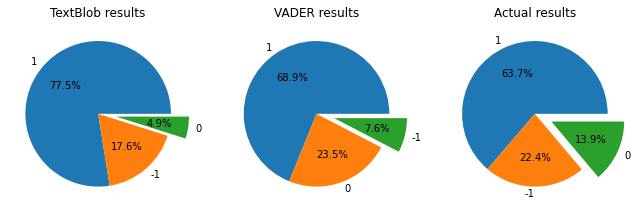

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,3)
plt.title("Actual results")
plt.pie(actual_counts.values, labels = actual_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


Observation:We Observe that Vader results results look a little close while the TextBlob results show a large variation.

In [43]:
from sklearn.metrics import accuracy_score
accuracy_text = accuracy_score(df2['rate_pred'] , df2['Analysis'])
accuracy_vader = accuracy_score(df2['rate_pred'] , df2['Vader Analysis'])
print(accuracy_text)
print(accuracy_vader)

0.7285292344325979
0.6675952284643623


In [45]:
df2.to_pickle("Ratings.pkl")